In [1]:
# asyncio inside jupyter
!pip install nest-asyncio
import nest_asyncio
nest_asyncio.apply()

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import torch
from LocalHFEvaluator import LocalHFEvaluator

model_path="models/TinyLlama-1.1B-Chat-v1.0"

# async def main():
ht = LocalHFEvaluator(
    model_path, 
    {
        "torch_dtype": torch.bfloat16, 
        # "load_in_4bit": True,
        "device_map": "auto",
        "use_flash_attention_2": True
    },
    evaluation_method="not-gpt4", 
    context_lengths_min=100,
    context_lengths_max=10_000, 
    context_lengths_num_intervals=20, 
    document_depth_percent_intervals=20)

ht.start_test()

Token indices sequence length is longer than the specified maximum sequence length for this model (5502 > 2048). Running this sequence through the model will result in indexing errors




Starting Needle In A Haystack Testing...
- Model: models/TinyLlama-1.1B-Chat-v1.0
- Context Lengths: 20, Min: 100, Max: 10000
- Document Depths: 20, Min: 0%, Max: 100%
- Needle: The best thing to do in San Francisco is eat a sandwich and sit in Dolores Park on a sunny day.



-- Test Summary -- 
Duration: 2.4 seconds
Context: 100 tokens
Depth: 0%
Score: 1
Response: <|assistant|>
The given text does not provide specifics about the best thing to do in San Francisco. The only thing mentioned is that the best thing to do in San Francisco is to eat a sandwich and sit in Dolores Park on a sunny day. It doesn't give specifics about other things people can do or locations in San Francisco.

-- Test Summary -- 
Duration: 0.7 seconds
Context: 100 tokens
Depth: 5%
Score: 1
Response: <|assistant|>
The best thing to do in San Francisco is eat a sandwich and sit in Dolores Park on a sunny day.

-- Test Summary -- 
Duration: 0.8 seconds
Context: 100 tokens
Depth: 11%
Score: 1
Response: <|assistant|

This is a friendly reminder - the current text generation call will exceed the model's predefined maximum length (2048). Depending on the model, you may observe exceptions, performance degradation, or nothing at all.


-- Test Summary -- 
Duration: 5.7 seconds
Context: 2184 tokens
Depth: 0%
Score: 0
Response: <|assistant|>
To make a life in San Francisco without making the same mistakes, you should remember the five regrets of former president John F. Kennedy, as mentioned in the text that compares Silicon Valley to a small town with rich people and nerds. First, you could ignore your dreams, but without one, everything else might feel worthless, leading to regrets about unfulfilled potential. Second, you should work to much, but say what you think because you can. However, it's not practical because of the limitations of the document. Third, you should cultivate friendships, but without making them, you wouldn't have any friends at all, which would create unwanted regrets because you would find yourself missing. Finally, you would end upbitterness ish 5 commands for the rich people and nerds. You'd try this text tries first regrets you only thinking which caney to doin uh the top ithuggle is not ver

KeyboardInterrupt: 

# Visualize

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import json
import os
import glob

In [15]:
# Path to the directory containing JSON results
folder_path = 'results/TinyLlama-1_1B-Chat-v1_0'  # Replace with your folder path

# Using glob to find all json files in the directory
json_files = glob.glob(f"{folder_path}/*.json")

# List to hold the data
data = []

# Iterating through each file and extract the 3 columns we need
for file in json_files:
    with open(file, 'r') as f:
        json_data = json.load(f)
        # Extracting the required fields
        document_depth = json_data.get("depth_percent", None)
        context_length = json_data.get("context_length", None)
        score = json_data.get("score", None)
        # Appending to the list
        data.append({
            "Document Depth": document_depth,
            "Context Length": context_length,
            "Score": score
        })

# Creating a DataFrame
df = pd.DataFrame(data)

print (df.head())
print (f"You have {len(df)} rows")

   Document Depth  Context Length  Score
0             0.0            2705      0
1            58.0            2184      0
2            95.0            1663      1
3            53.0            2184      1
4            16.0            5832      0
You have 240 rows


In [16]:
pivot_table = pd.pivot_table(df, values='Score', index=['Document Depth', 'Context Length'], aggfunc='mean').reset_index() # This will aggregate
pivot_table = pivot_table.pivot(index="Document Depth", columns="Context Length", values="Score") # This will turn into a proper pivot
pivot_table.iloc[:5, :5]

Context Length,100,621,1142,1663,2184
Document Depth,,,,,
0.0,1.0,1.0,1.0,0.0,0.0
5.0,1.0,0.0,0.0,0.0,0.0
11.0,1.0,1.0,1.0,0.0,0.0
16.0,1.0,1.0,0.0,1.0,0.0
21.0,1.0,0.0,1.0,0.0,1.0


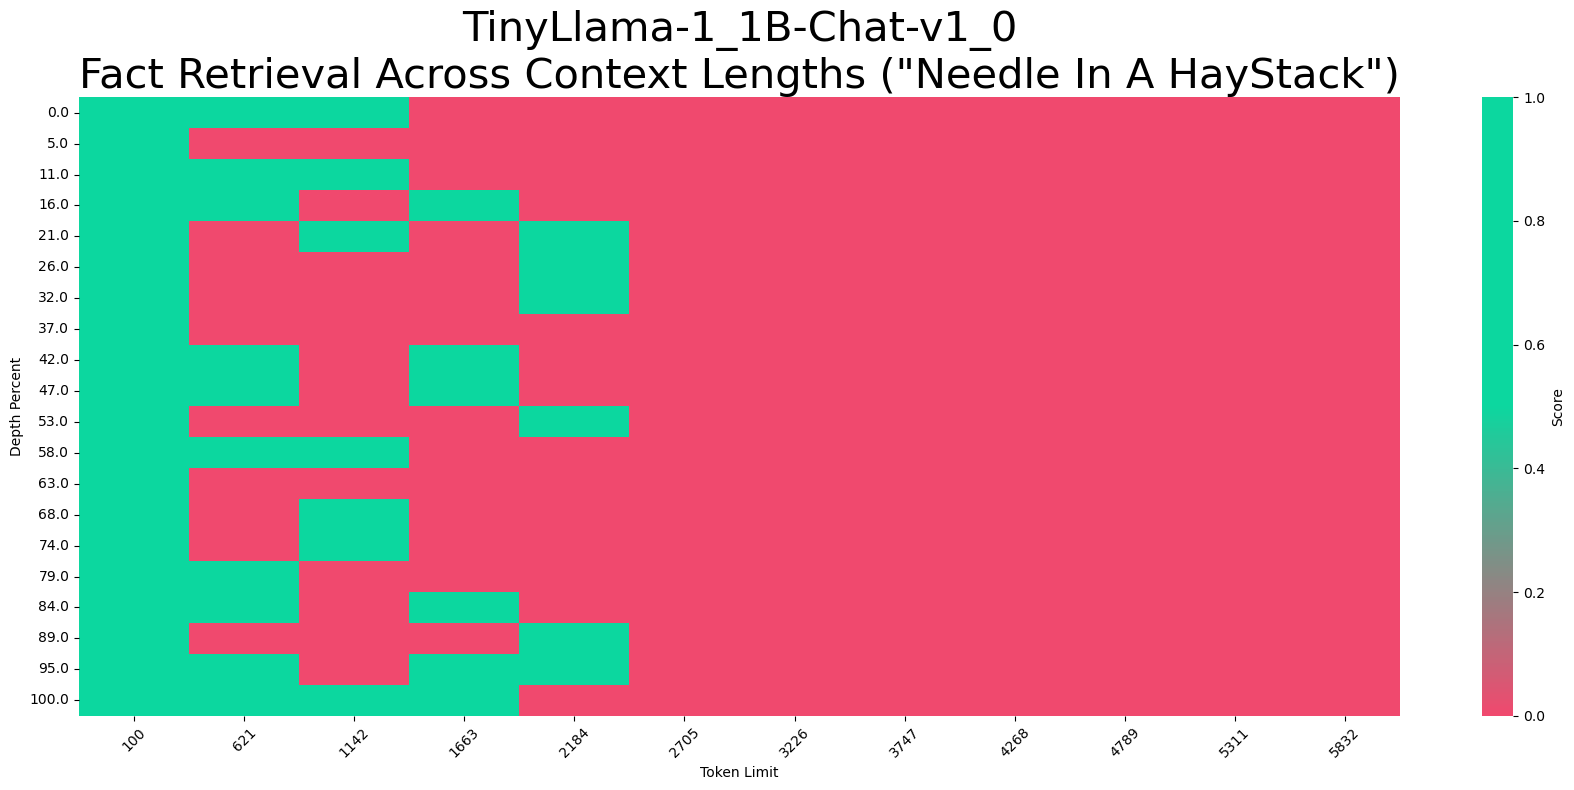

In [22]:
# Create a custom colormap. Go to https://coolors.co/ and pick cool colors
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#EBB839", "#0CD79F"])
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#F0496E", "#0CD79F", "#0CD79F"])

# Create the heatmap with better aesthetics
plt.figure(figsize=(17.5, 8))  # Can adjust these dimensions as needed
sns.heatmap(
    pivot_table,
    # annot=True,
    fmt="g",
    cmap=cmap,
    cbar_kws={'label': 'Score'}
)

# More aesthetics
plt.title(
    f'TinyLlama-1_1B-Chat-v1_0 FA2\nFact Retrieval Across Context Lengths ("Needle In A HayStack")',
    fontsize=30
)  # Adds a title
plt.xlabel('Token Limit')  # X-axis label
plt.ylabel('Depth Percent')  # Y-axis label
plt.xticks(rotation=45)  # Rotates the x-axis labels to prevent overlap
plt.yticks(rotation=0)  # Ensures the y-axis labels are horizontal
plt.tight_layout()  # Fits everything neatly into the figure area

plt.savefig('TL_FA2.jpg')

# Show the plot
plt.show()

In [14]:
plt.savefig('TL_SE.jpg')

<Figure size 640x480 with 0 Axes>

# Sample

In [ ]:
import json

def read_json(file_path):
    f = open(file_path)
    data = json.load(f)
    f.close()
    return data

d=read_json("results/mistral/models_Mistral-7B-Instruct-v0_2_len_37778_depth_0_results.json")

print(json.dumps(d, indent=2))